# Simulated Annealing
## Proyecto Corto 2 - Inteligencia Artificial

Enlace de Github: https://github.com/brayanfa07/IA-PC2
        
### Integrantes

- Brayan Fajardo Alvarado
- Fabricio Castillo Alvarado
- Gerald Mora Mora

# 1. ¿Qué es un algoritmo de Simulated Annealing?
---

A este algoritmo se le llama en español como ***Cristalización simulada, temple simulado*** o ***recocido simulado***.


Es un algoritmo estocástico de búsqueda local, el cual es una combinación del __Hill Climbing__ (___Búsqueda local voraz___) con recorridos aleatorios, con el que se permite optimizar globalmente el valor objetivo de una función.

> Los algoritmos de búsqueda local operan usando el nodo actual y se mueven entre los vecinos del nodo. Además, usan menos memoria y puede encontrar soluciones razonables donde algoritmos sistemáticos son inadecuados.  
También permiten resolver problemas de optimización pura, en el cual hay que encontrar el mejor estado, ya sea mínimo o máximo, de acuerdo a una función objetivo.

__Hill Climbing__ permite realizar una búsqueda local del vecino que logre cumplir el menor costo (mínimo local). Esto lo convierte en un algoritmo __incompleto__, ya que no logra llegar al valor mínimo global de la función, pero es eficiente por el espacio de soluciones.

Los algoritmos que se mueven hacia un sucesor elegido de forma uniformemente aleatoria de entre un conjunto de sucesores son __completos__, pero __ineficientes__.

## 2. Características de Simulated Annealing
---

- Proviene del *annealing* en metalurgia, que es el proceso en el cual se calienta un metal o un vidrio a muy alta temperatura, y luego se enfría de forma muy lenta, permitiendo que las partículas se recoloquen o reacomoden en estados bajos de energía. Esto permite tener mejor resistencia y flexibilidad en los metales.

![](images/annealing 2.jpeg)

- Este algoritmo pretende evitar los mínimos locales, y busca encontrar el mínimo global de una función, tratando de no quedarse atascado en un mínimo local cercano, y que sea el más próximo al mínimo global.

![](images/function.png)



Para comprender mejor este algoritmo, hay que verlo como si fuera una bola de ping-pong que va descendiendo sobre una superficie desigual con un montón de grietas o hendiduras, en la que se mantiene en un estado de movimiento aleatorio constante.

Al momento de dejar que descienda la bola, esta se va quedar atascada en la primera grieta que encuentre en su descenso (mínimo local), pero se va seguir moviendo hasta encontrar otra grieta a una profundidad más baja, y así sucesivamente hasta que se baje la intensidad del movimiento de la bolita hasta quedar en una profundidad cercana a la profundidad más baja que tengan las grietas en la superficie.

![Mínimo local y mínimo global](images/minimum.png)

## 3. Ecuación de cálculo del algoritmo de simulated annealing
---

Dada una función se tiene que:




## 4. Pseudocódigo de función de Simulated Annealing
---


![Pseudocódigo del algoritmo de simulated annealing](images/pseudocode.png)

##  5. Implementación básica de Simulated Annealing en Python
---

In [24]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from scipy import optimize 

### Intervalo de estados

In [25]:
interval_estate = (0, 10)

### Funcion a minimizar

In [26]:
def f(x):
    #return 0.2 + x**2 + x**2 - 0.1*math.cos(6.0*3.1415*x) - 0.1*math.cos(6.0*3.1415*x)
    return x ** 2

In [27]:
def random_start():
    a, b = interval_estate
    return a + (b - a) * rand.random_sample()

In [28]:
def neighbour(x):
    amplitude = (max(interval_estate) - min(interval_estate)) * 1 / 10
    delta = (-amplitude/2.) + amplitude * rand.random_sample()
    a, b = interval_estate
    return max(min(x + delta, b), a)

In [29]:
def probability(cost, new_cost, temperature):
    if new_cost < cost:
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        return p

In [30]:
def temperature(c, temp):
    return max(0.01, min(temp, temp - c))

## Función de Simulated annealing

In [31]:
def annealing(random_start,temp, maxsteps=1000):
    state = random_start()
    cost = f(state)
    temp_list=[]
    states, costs = [state], [cost]
    for step in range(maxsteps):
        c = step / float(maxsteps)
        T = temperature(c, temp)
        new_state = neighbour(state)
        new_cost = f(new_state)
        temp_list += [T]
        #print("Reiteracion #"+str(step)+" : \n     Temperatura = "+str(T)+", \n     Estado = "+str(state)+", \n     Nuevo estado = "+str(new_state))
        if probability(cost, new_cost, T) > rand.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
    return state, f(state), states, temp_list

In [37]:
mpl.rcParams['figure.figsize'] = (15, 4)
def plot1(states, temp_list):
    plt.figure()
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("Evolucion de los estados con simulated annealing", fontsize=14)
    plt.ylabel('Estados')
    plt.xlabel('Pasos o iteraciones')
    plt.show()

In [33]:
def plot2(states, temp_list):
    plt.figure()
    plt.subplot(121)
    plt.plot(temp_list, 'g')
    plt.title("Descenso de la temperatura para garantizar la convergencia al minimo global", fontsize=14)
    plt.ylabel('Temperatura')
    plt.xlabel('Pasos o iteraciones')
    plt.show()

In [34]:
state, c, states, temp_list = annealing(random_start, 4, maxsteps=1000)

### Convergencia al mínimo global

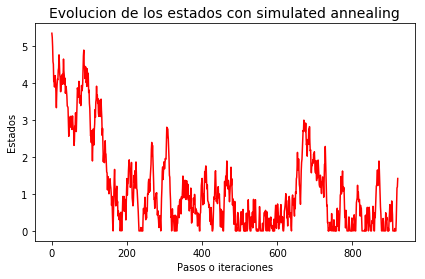

In [35]:
plot1(states, temp_list)

### Descenso de la temperatura

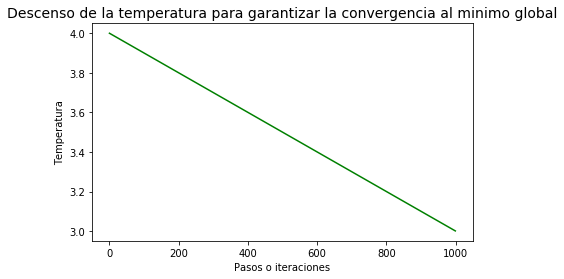

In [36]:
plot2(states, temp_list)

# Referencias Bibliográficas